In [1]:
import pandas as pd

# Paths to files (replace with actual paths on Kaggle)
edges_path = '/kaggle/input/collab/COLLAB/COLLAB.edges'
graph_idx_path = '/kaggle/input/collab/COLLAB/COLLAB.graph_idx'
graph_labels_path = '/kaggle/input/collab/COLLAB/COLLAB.graph_labels'

# Load files
edges_df = pd.read_csv(edges_path, header=None, names=['source', 'target'])
graph_idx_df = pd.read_csv(graph_idx_path, header=None, names=['graph_id'])
graph_labels_df = pd.read_csv(graph_labels_path, header=None, names=['label'])


In [2]:
# Inspect the data
print(edges_df.head())
print(graph_idx_df.head())
print(graph_labels_df.head())

   source  target
0       1       2
1       2       1
2       1       3
3       3       1
4       1       4
   graph_id
0         1
1         1
2         1
3         1
4         1
   label
0      1
1      1
2      1
3      1
4      1


In [3]:
import networkx as nx

# Dictionary to hold graphs
subgraphs = {}

# Iterate over each unique graph_id
for graph_id in graph_idx_df['graph_id'].unique():
    # Get the indices where the graph_id matches
    mask = graph_idx_df['graph_id'] == graph_id
    indices = mask[mask].index
    
    # Get edges for this graph
    graph_edges = edges_df.iloc[indices].values
    
    # Create the graph
    G = nx.Graph()
    G.add_edges_from(graph_edges)
    
    # Assign a label to the graph (if exists)
    label = graph_labels_df.loc[graph_id, 'label'] if graph_id in graph_labels_df.index else None
    G.graph['label'] = label
    
    # Store the graph
    subgraphs[graph_id] = G


In [6]:
import random
import networkx as nx


# Number of graphs to display results for
n_random_graphs = 5
random_graph_ids = random.sample(list(subgraphs.keys()), min(n_random_graphs, len(subgraphs)))

for graph_id, G in subgraphs.items():
    if graph_id in random_graph_ids:
        print(f"Graph ID: {graph_id}, Label: {G.graph['label']}")
        print(f"Number of nodes: {G.number_of_nodes()}")
        print(f"Number of edges: {G.number_of_edges()}")
        print('\n')
    # Add additional analysis as needed


Graph ID: 1817, Label: 1
Number of nodes: 31
Number of edges: 32


Graph ID: 2226, Label: 1
Number of nodes: 24
Number of edges: 22


Graph ID: 4332, Label: 3
Number of nodes: 154
Number of edges: 178


Graph ID: 4762, Label: 3
Number of nodes: 82
Number of edges: 145


Graph ID: 4911, Label: 3
Number of nodes: 24
Number of edges: 22




In [7]:
# Check for duplicates and missing values
print('null nodes', edges_df.isnull().sum())  # Check for missing values
print('duplicated nodes', edges_df.duplicated().sum())  # Check for duplicates

# Drop duplicates if necessary
edges_df.drop_duplicates(inplace=True)


null nodes source    0
target    0
dtype: int64
duplicated nodes 24574995


In [8]:
#checking if all duplicated nodes are deleted
print('duplicated nodes', edges_df.duplicated().sum())

duplicated nodes 0


In [9]:
import networkx as nx

def print_node_measures(graph, num_nodes=5):
    """
    Prints clustering coefficient and degree centrality for a few nodes in the graph.

    Parameters:
    - graph: The NetworkX graph.
    - num_nodes: Number of nodes to print measures for (default is 5).
    """
    # Compute clustering coefficient and degree centrality
    clustering_coeffs = nx.clustering(graph)
    degree_centrality = nx.degree_centrality(graph)

    # Select a few nodes (up to `num_nodes`)
    selected_nodes = list(graph.nodes)[:num_nodes]

    print(f"Displaying measures for {len(selected_nodes)} nodes in Graph:")
    for node in selected_nodes:
        print(f"Node {node}:")
        print(f"  Clustering Coefficient: {clustering_coeffs[node]}")
        print(f"  Degree Centrality: {degree_centrality[node]}")
    print("\n")

# Example usage
# Use this function for any graph in your subgraphs dictionary
sample_graph_id = list(subgraphs.keys())[0]  # Example: select the first graph
print_node_measures(subgraphs[sample_graph_id], num_nodes=5)


Displaying measures for 5 nodes in Graph:
Node 1:
  Clustering Coefficient: 0
  Degree Centrality: 1.0
Node 2:
  Clustering Coefficient: 0
  Degree Centrality: 0.043478260869565216
Node 3:
  Clustering Coefficient: 0
  Degree Centrality: 0.043478260869565216
Node 4:
  Clustering Coefficient: 0
  Degree Centrality: 0.043478260869565216
Node 5:
  Clustering Coefficient: 0
  Degree Centrality: 0.043478260869565216




In [10]:
import random
import networkx as nx


# Number of graphs to display results for
n_random_graphs = 5
random_graph_ids = random.sample(list(subgraphs.keys()), min(n_random_graphs, len(subgraphs)))

# Compute network measures for each graph
for graph_id, G in subgraphs.items():
    # Average clustering coefficient
    avg_clustering = nx.average_clustering(G)
    
    # Degree centrality
    centrality = nx.degree_centrality(G)

    betweenness = nx.betweenness_centrality(G)

    
    if graph_id in random_graph_ids:
        print(f"Graph {graph_id}:")
        print(f"  Average Clustering Coefficient: {avg_clustering}")
        print(f"  Degree Centrality (first 5 nodes): {list(centrality.items())[:5]}")
        print("Betweenness Centrality:", list(betweenness.items())[:5])
        print("\n")


Graph 2397:
  Average Clustering Coefficient: 0.07627813205355773
  Degree Centrality (first 5 nodes): [(2805, 0.038461538461538464), (2834, 0.8076923076923077), (2809, 0.038461538461538464), (2811, 0.038461538461538464), (2812, 0.038461538461538464)]
Betweenness Centrality: [(2805, 0.0), (2834, 0.9230769230769231), (2809, 0.0), (2811, 0.0), (2812, 0.0)]


Graph 3277:
  Average Clustering Coefficient: 0.0
  Degree Centrality (first 5 nodes): [(3584, 1.0), (3538, 0.05263157894736842), (3541, 0.05263157894736842), (3543, 0.05263157894736842), (3544, 0.05263157894736842)]
Betweenness Centrality: [(3584, 1.0), (3538, 0.0), (3541, 0.0), (3543, 0.0), (3544, 0.0)]


Graph 3366:
  Average Clustering Coefficient: 0.0
  Degree Centrality (first 5 nodes): [(3683, 0.05555555555555555), (3641, 0.2777777777777778), (3685, 0.05555555555555555), (3687, 0.05555555555555555), (3689, 0.05555555555555555)]
Betweenness Centrality: [(3683, 0.0), (3641, 0.06535947712418301), (3685, 0.0), (3687, 0.0), (3689, 

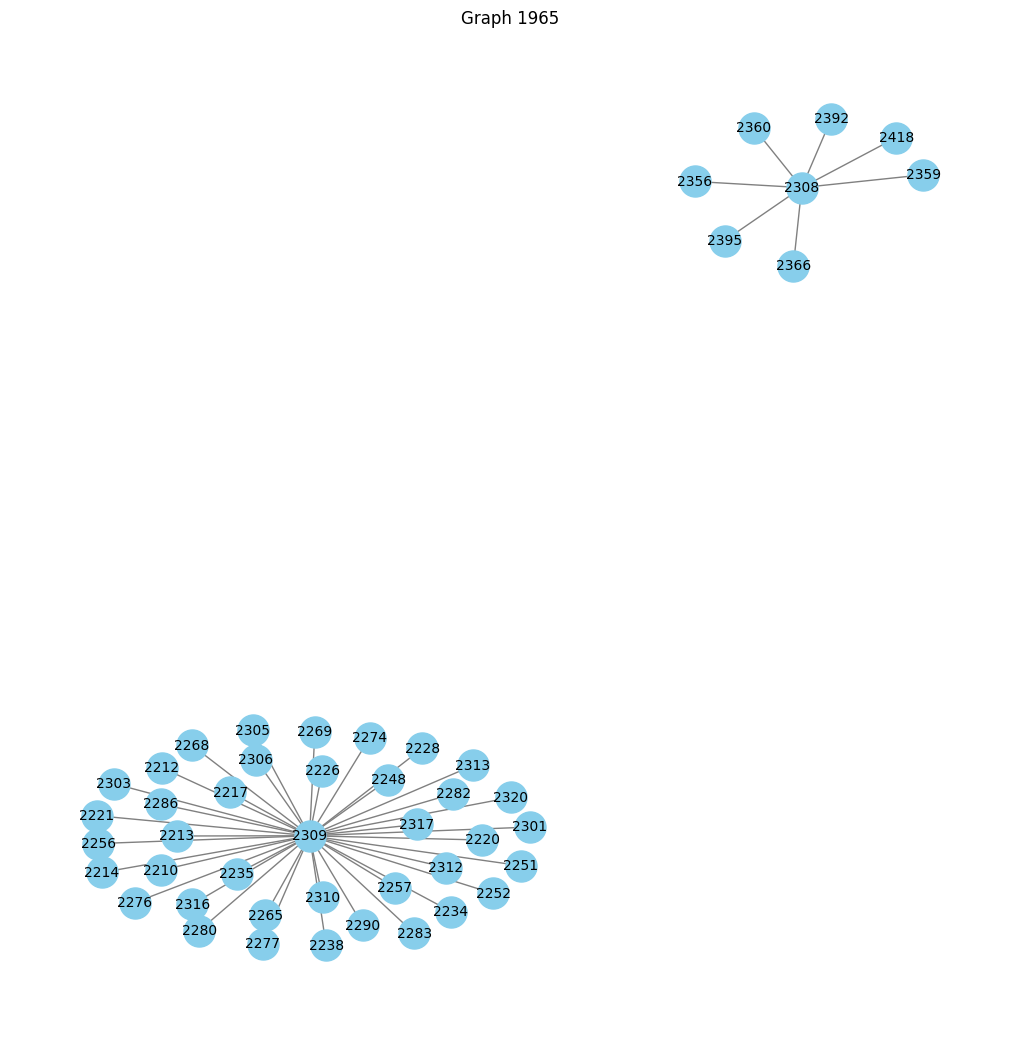

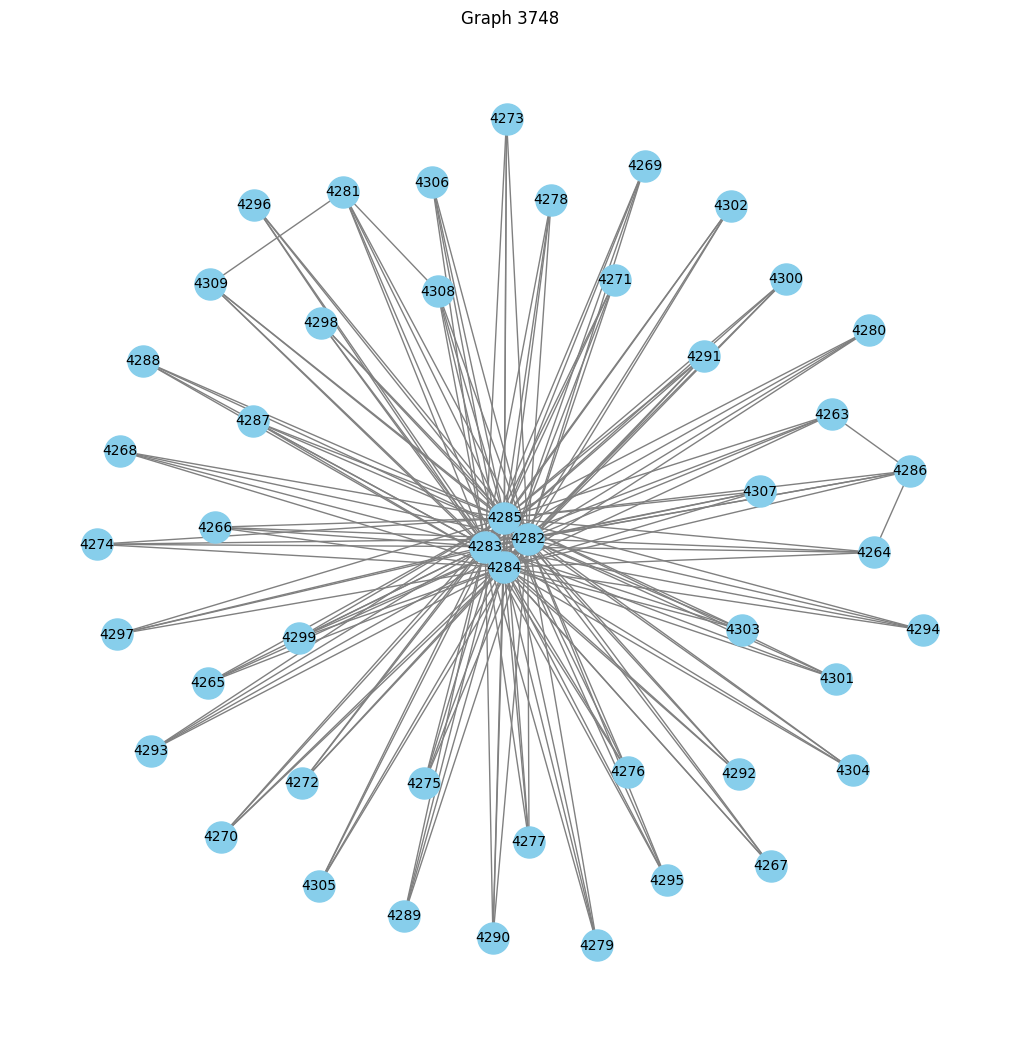

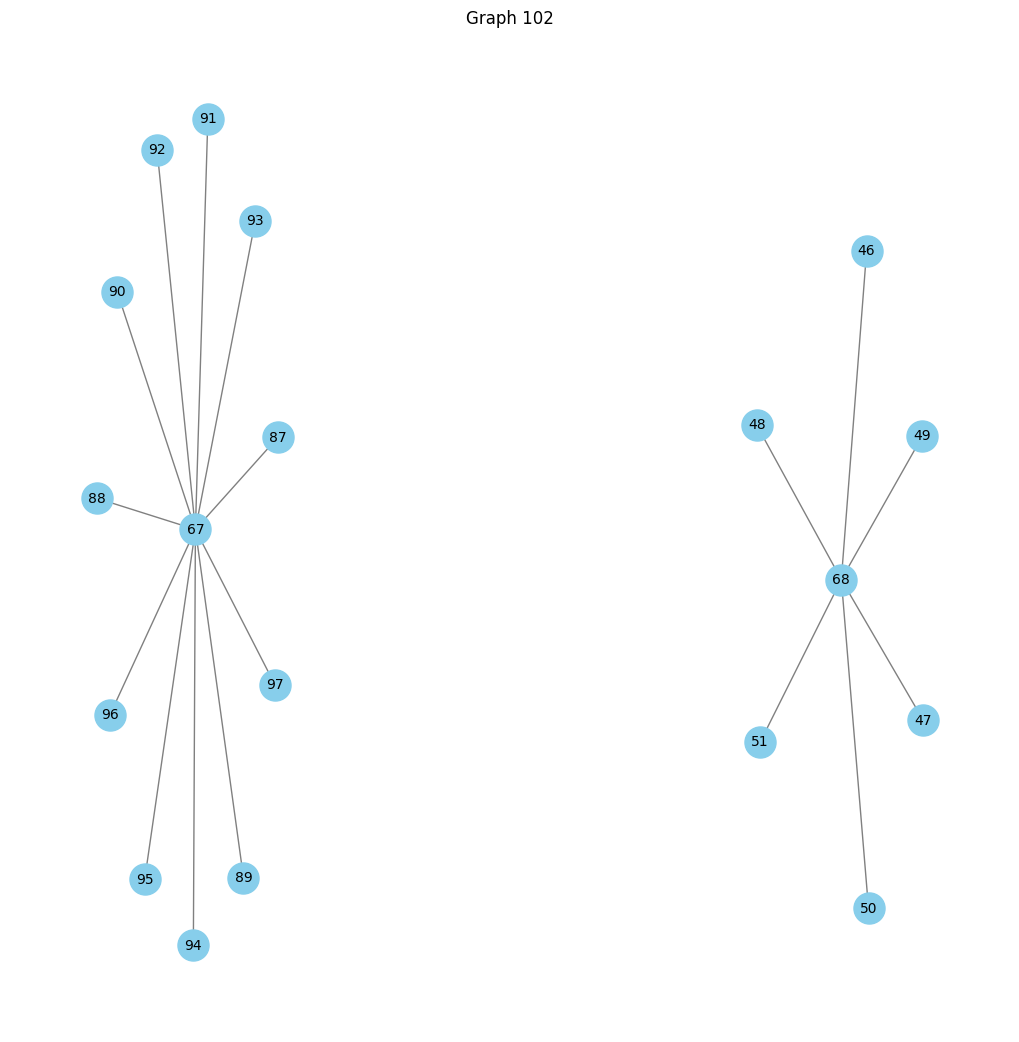

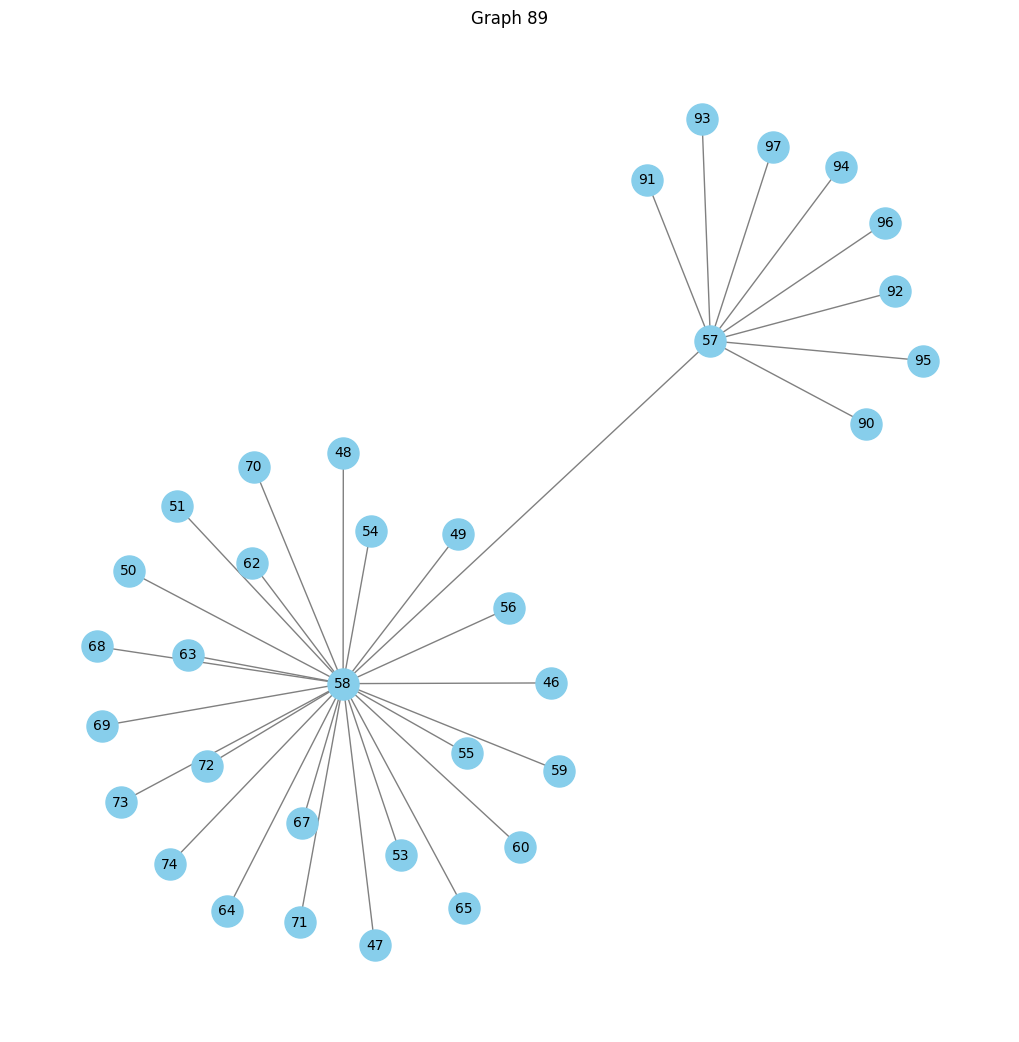

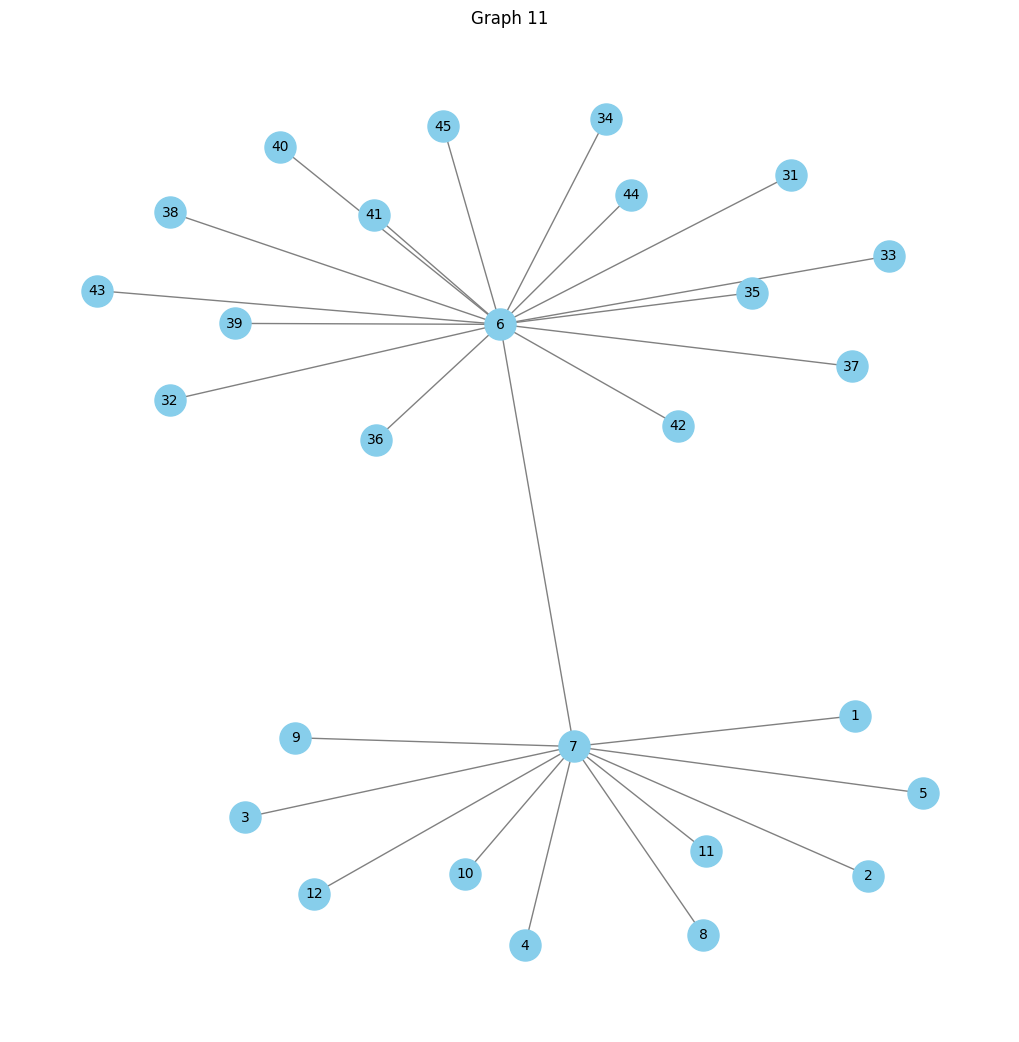

In [11]:
import random
import matplotlib.pyplot as plt
import networkx as nx

# Number of graphs to visualize
n_random_graphs = 5

# Randomly select n_random_graphs from all available graph IDs
random_graph_ids = random.sample(list(subgraphs.keys()), min(n_random_graphs, len(subgraphs)))

# Visualize each randomly selected graph
for graph_id in random_graph_ids:
    G = subgraphs[graph_id]  # Get the graph
    
    # Plot the graph
    plt.figure(figsize=(10, 10))
    nx.draw(G, with_labels=True, node_size=500, node_color="skyblue", font_size=10, edge_color="gray")
    plt.title(f"Graph {graph_id}")
    plt.show()



In [13]:
from networkx.algorithms.community import greedy_modularity_communities

communities = greedy_modularity_communities(G)
for i, community in enumerate(communities):
    print(f"Community {i}: {list(community)}")

Community 0: [32, 33, 34, 35, 36, 37, 6, 38, 39, 40, 41, 42, 43, 44, 45, 31]
Community 1: [1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12]
